In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math
%matplotlib inline

In [2]:
def check_data_interval(timestamps):
    intervals = set()
    for i in xrange(1, timestamps.shape[0]):
        intervals.add( timestamps.iloc[i] - timestamps.iloc[i-1] )
    return intervals

In [3]:
def rescale_pattern(pattern, new_min=0, new_max=1):
    cur_min = min(pattern)
    cur_max = max(pattern)
    cur_range = cur_max - cur_min
    pattern = pattern - cur_min
    pattern = pattern / cur_range
    return pattern
    

In [4]:
def extract_patterns(data, pattern_length=5, debug=False):
    # 0th column is timestamp
    # 1th column is the data
    patterns = []
    intervals = check_data_interval(data.iloc[:,0])
    if len(intervals) != 1:
        print "Non-uniform data rate:", intervals
        return None
    (nrow, ncol) =  data.shape
    for i in xrange(pattern_length, nrow):
        pattern = data.iloc[i-pattern_length:i,1]
        pattern_r = rescale_pattern(pattern)
        patterns.append(pattern_r.tolist())
        if debug is True:
            print pd.DataFrame( [pattern, pattern_r] )
            plt.figure()
            plt.plot(xrange(0,pattern_length), pattern_r)
            plt.show()
    return patterns
    

In [5]:
def reduce_patterns(patterns):
    # TODO write function to cluster patterns and use centroids
    return None

In [6]:
def euclidean_dist(x, y):
    if len(x) != len(y):
        return None
    dist_sq = 0.0
    for i in xrange(0, len(x)):
        dist_sq += (x[i] - y[i])**2
    return math.sqrt(dist_sq)

In [7]:
def use_patterns(pattern_db, data):
    # 0th column is timestamp
    # 1th column is the data
    pattern_length = len(patterns[0])
    intervals = check_data_interval(data.iloc[:,0])
    if len(intervals) != 1:
        print "Non-uniform data rate:", intervals
        return None
    (nrow, ncol) =  data.shape
    reconst_err = 0.0
    reconst_seq = []
    reconst_err_seq = []
    for i in xrange(pattern_length, nrow):
        pattern = data.iloc[i-pattern_length:i,1]
        pattern_r = rescale_pattern(pattern)
        best_dist = None
        best_patt = None
        for j in xrange(0, len(pattern_db)):
            cur_dist = euclidean_dist(pattern_r.tolist(), pattern_db[j])
            if  best_dist is None or best_dist > cur_dist:
                best_dist = cur_dist
                best_patt = j
        reconst_err += best_dist
        reconst_seq.append(best_patt)
        reconst_err_seq.append(best_dist)
    return (reconst_err, reconst_seq, reconst_err_seq)
                
                
    

In [8]:
filename = '../data/ydata-labeled-time-series-anomalies-v1_0/A3Benchmark/A3Benchmark-TS13.csv'

In [9]:
data = pd.read_csv(filename)
data.head()

,timestamps,value,anomaly,changepoint,trend,noise,seasonality1,seasonality2,seasonality3
0,1.416722e+09,25.464272,0,0,1,24.464272,0.000000,0.000000,0.000000
1,1.416726e+09,619.248412,0,0,2,35.448031,394.650000,166.084181,21.066199
2,1.416730e+09,1029.624273,0,0,3,-19.882513,683.553851,320.850000,42.102935
3,1.416733e+09,1273.160984,0,0,4,-36.970224,789.300000,453.750421,63.080786
4,1.416737e+09,1377.067944,0,0,5,48.815178,683.553851,555.728502,83.970413


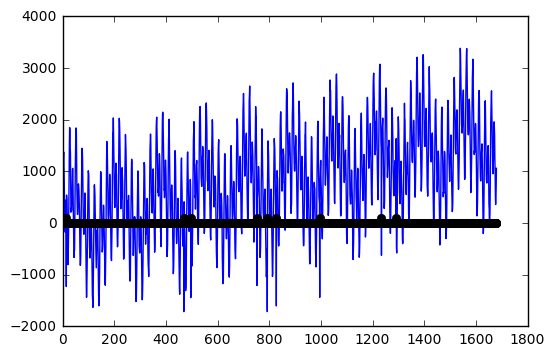

In [10]:
plt.plot(data.value)
plt.plot(data.anomaly[:]*100, 'ko')

In [11]:

train_data = data.iloc[100:200,:]
test_data_anom = data.iloc[0:50,:]
test_data_norm = data.iloc[50:100,:]

In [12]:
patterns = extract_patterns(train_data)

Error on anomaly test data = 8.81059405297


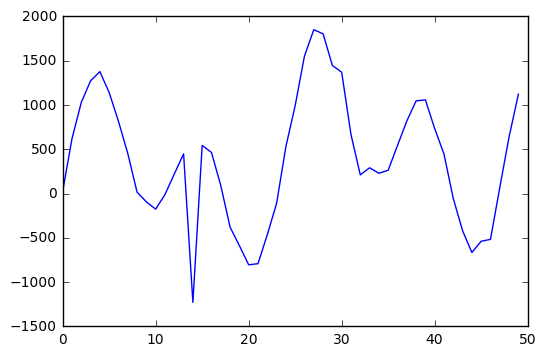

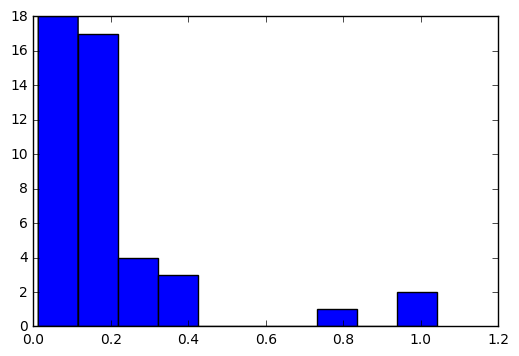

In [20]:
(err_anom, seq_anom, err_seq_anom) = use_patterns(patterns, test_data_anom)
print "Error on anomaly test data =", err_anom
plt.figure()
plt.plot(test_data_anom.iloc[:,1])
plt.show()
plt.figure()
plt.hist(err_seq_anom)
plt.show()

Error on normal test data = 5.42935485613


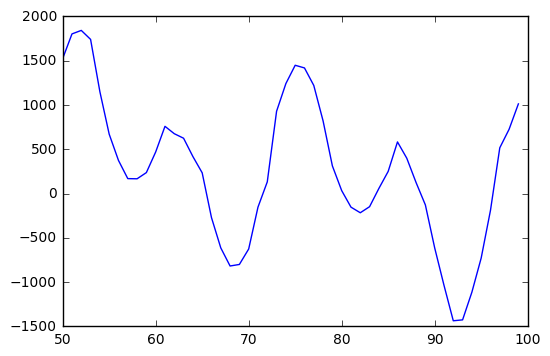

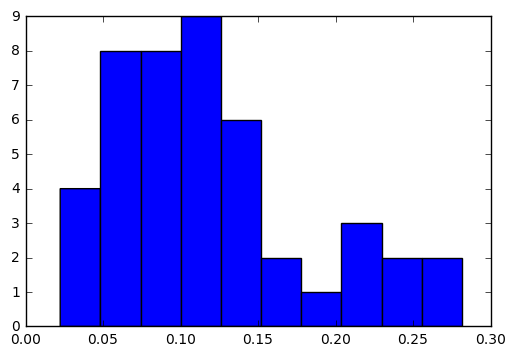

In [18]:
(err_norm, seq_norm, err_seq_norm) = use_patterns(patterns, test_data_norm)
print "Error on normal test data =", err_norm
plt.figure()
plt.plot(test_data_norm.iloc[:,1])
plt.show()
plt.figure()
plt.hist(err_seq_norm)
plt.show()

In [15]:
test_data_anom

,timestamps,value,anomaly,changepoint,trend,noise,seasonality1,seasonality2,seasonality3
0,1.416722e+09,25.464272,0,0,1,24.464272,0.000000e+00,0.000000e+00,0.000000
1,1.416726e+09,619.248412,0,0,2,35.448031,3.946500e+02,1.660842e+02,21.066199
2,1.416730e+09,1029.624273,0,0,3,-19.882513,6.835539e+02,3.208500e+02,42.102935
3,1.416733e+09,1273.160984,0,0,4,-36.970224,7.893000e+02,4.537504e+02,63.080786
4,1.416737e+09,1377.067944,0,0,5,48.815178,6.835539e+02,5.557285e+02,83.970413
5,1.416740e+09,1140.590796,0,0,6,15.363593,3.946500e+02,6.198346e+02,104.742599
6,1.416744e+09,815.362212,0,0,7,41.293918,9.666137e-14,6.417000e+02,125.368294
7,1.416748e+09,452.568716,0,0,8,73.565463,-3.946500e+02,6.198346e+02,145.818650
8,1.416751e+09,15.940861,0,0,9,-31.298855,-6.835539e+02,5.557285e+02,166.065065
9,1.416755e+09,-93.675106,0,0,10,45.795249,-7.893000e+02,4.537504e+02,186.079224
